<a href="https://colab.research.google.com/github/saliiimm/data-clustering-for-customer-personality-analysis-dataset/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries,modules and dataset

In [118]:
#as ususal here we just import basic libraries abd then download dataset in the next cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1


# Data reading and analyzing

In [120]:
#setting options to read clearly the dataset and read the 5 first inputs
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/root/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1/marketing_campaign.csv',sep= '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [121]:
#lets check a sample
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1703,1958,1973,PhD,Together,55012.0,0,1,21-03-2014,85,582,0,65,0,0,13,6,8,2,9,5,0,0,0,0,0,0,3,11,0
1659,2781,1981,Graduation,Single,72066.0,0,0,23-06-2014,55,1003,34,536,134,51,34,1,4,6,6,2,0,0,1,1,0,0,3,11,1
709,4301,1971,Master,Married,35178.0,1,0,10-01-2013,10,23,1,13,2,2,18,1,1,1,2,7,1,0,0,0,0,0,3,11,1
848,2895,1963,Graduation,Single,49980.0,0,1,23-10-2013,79,104,1,54,13,9,14,2,3,1,5,5,0,0,0,0,0,0,3,11,0
244,6439,1958,Graduation,Married,61074.0,0,1,17-08-2012,37,789,0,133,0,28,152,7,11,5,8,7,0,0,0,0,0,0,3,11,0
171,6460,1982,Graduation,Married,28718.0,1,0,13-07-2013,78,12,4,6,11,8,16,2,2,0,3,8,0,0,0,0,0,0,3,11,0
234,3233,1965,PhD,Married,62745.0,0,1,23-03-2013,89,562,21,464,28,10,32,3,7,8,11,5,0,0,0,0,0,0,3,11,0
199,3182,1973,PhD,Single,46854.0,1,1,31-03-2014,81,96,1,79,7,1,79,6,5,1,3,8,1,0,0,0,0,0,3,11,1
1506,851,1972,Master,Married,57136.0,1,1,09-07-2013,48,306,5,109,21,109,92,9,5,2,10,6,0,0,0,0,0,0,3,11,0
441,7495,1948,PhD,Married,56223.0,0,1,20-12-2013,72,77,28,31,16,0,4,2,2,1,5,4,0,0,0,0,0,0,3,11,0


In [122]:
#lets see datatypes t know what changes we can do
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [123]:
#check for null or duplicated values as usual
df.isna().values.sum()

np.int64(24)

In [124]:
df = df.dropna()
df.isna().values.sum()

np.int64(0)

In [125]:
df.duplicated().values.sum()

np.int64(0)

In [126]:
#here we see unique values for each feature so we can know for each one what type of encoding we can apply,we can also start thinking about creating new features
for col in df:
  print(col,df[col].unique())

ID [5524 2174 4141 ... 7270 8235 9405]
Year_Birth [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1976 1959 1952 1987
 1946 1980 1949 1982 1979 1951 1969 1989 1963 1970 1973 1943 1975 1996
 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1983 1945 1991
 1962 1953 1956 1992 1961 1900 1986 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Education ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Income [58138. 46344. 71613. ... 56981. 69245. 52869.]
Kidhome [0 1 2]
Teenhome [0 1 2]
Dt_Customer ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '31-05-2013'
 '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012' '20-02-2013'
 '29

# data cleaning and feature engineering

In [127]:
#since the first features have only one value and id is useless,we remove them
df = df.drop(columns = ['Z_Revenue','Z_CostContact','ID'])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [128]:
#new feature: we calculate the amount spent in the last two years by additionning the amounts for each category
df["total_spent_last_two_years"] = (
    df['MntWines'] + df["MntFruits"] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422


In [130]:
#remove weird marital statuses
df["Marital_Status"] = df["Marital_Status"].replace({"Absurd": "Unknown", "YOLO": "Unknown","Alone" : "Single"})

<Axes: xlabel='Marital_Status', ylabel='total_spent_last_two_years'>

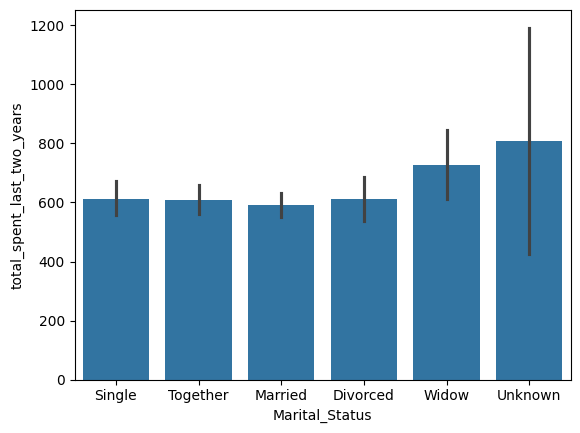

In [131]:
#lets see if the marital status influenece our depenses
y = df["total_spent_last_two_years"]
x = df['Marital_Status']
sns.barplot(data = df,x =x,y = y)

In [132]:
#new feature: calculating the number of children by additioning kidhome and teenhome
df['Num_Children'] = ( df['Kidhome'] + df['Teenhome'])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1


In [133]:
#new feature:calculate age based on year of birth
df['age'] = (  2025 - df['Year_Birth']  )
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children,age
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,68
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2,71
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,60
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1,41
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1,44


In [134]:
#new feature:lets assign generation based on birth year and see if the latest gen(gen z) depense a lot!
def assign_generation(year):
    if 1928 <= year <= 1945:
        return "Silent Generation"
    elif 1946 <= year <= 1964:
        return "Baby Boomers"
    elif 1965 <= year <= 1980:
        return "Generation X"
    elif 1981 <= year <= 1996:
        return "Millennials"
    elif 1997 <= year <= 2012:
        return "Generation Z"
    elif year >= 2013:
        return "Generation Alpha"
    else:
        return 'Unknown'

df["Generation"] = df["Year_Birth"].apply(assign_generation)

df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children,age,Generation
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,68,Baby Boomers
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2,71,Baby Boomers
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,60,Generation X
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1,41,Millennials
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1,44,Millennials


In [135]:
#new feature: calculate numer of family members based on marital status and num of children
marital_status = {'Married' : 2,
                  'Together' : 2,
                  'Single' : 1,
                  'Divorced' : 1,
                  'Widow' : 1,
                  'Unknown' : 1,
                 }
df['Family_Members_Count'] = df['Num_Children'] + df['Marital_Status'].apply(lambda x : marital_status[x])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children,age,Generation,Family_Members_Count
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,68,Baby Boomers,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2,71,Baby Boomers,3
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,60,Generation X,2
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1,41,Millennials,3
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1,44,Millennials,3


In [136]:
#new feature:check if he is parent or not(boolean)
df['isParent'] = df['Num_Children'].apply(lambda x: 1 if x > 0 else 0 )
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children,age,Generation,Family_Members_Count,isParent
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,68,Baby Boomers,1,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2,71,Baby Boomers,3,1
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,60,Generation X,2,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1,41,Millennials,3,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1,44,Millennials,3,1


In [137]:
#new feature:calculate the number of puchases based on different puchases categories
df['NumPurchases'] = (
    df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases']
)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children,age,Generation,Family_Members_Count,isParent,NumPurchases
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,68,Baby Boomers,1,0,21
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2,71,Baby Boomers,3,1,4
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,60,Generation X,2,0,11
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1,41,Millennials,3,1,4
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1,44,Millennials,3,1,13




# Data vizualization

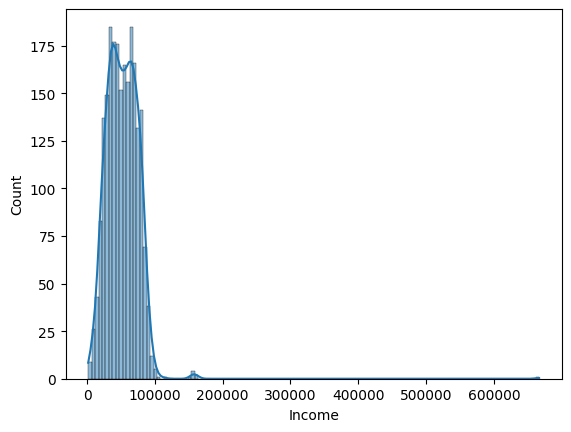

In [138]:
#lets see how the income changes and what is the range
sns.histplot(data= df, x='Income', kde=True)
plt.show()

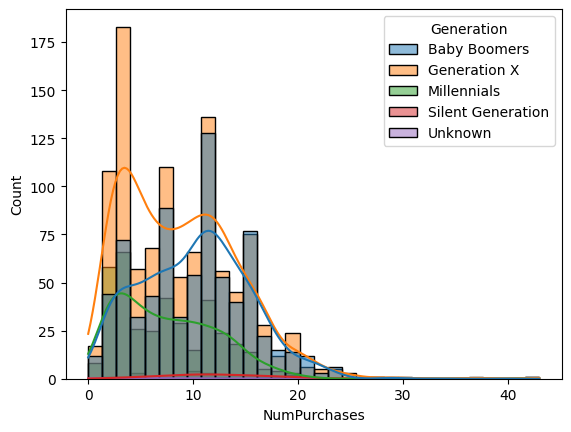

In [140]:
#lets verify if generation influence buys,and as we see baby boomers and gen x are the one with most buyings,
#so basically i think it is because they have a family,are married,have children to take care of,so the need to buy many times and a lot
sns.histplot(data= df, x='NumPurchases',hue = 'Generation', kde=True)
plt.show()

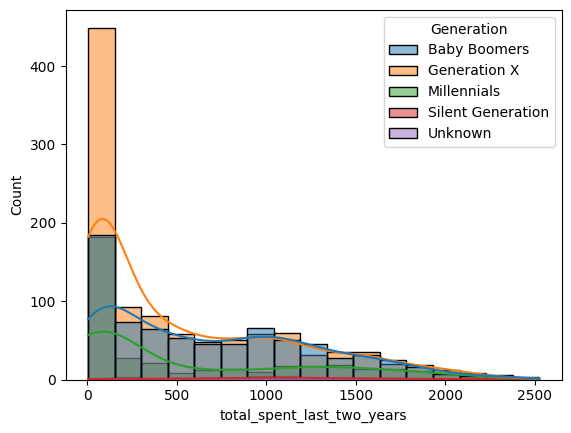

In [141]:
#millenials spent a lot because they are young and want to have fun,lets check in the next ceel if the children responsability influence that
sns.histplot(data= df, x='total_spent_last_two_years',hue = 'Generation', kde=True)
plt.show()

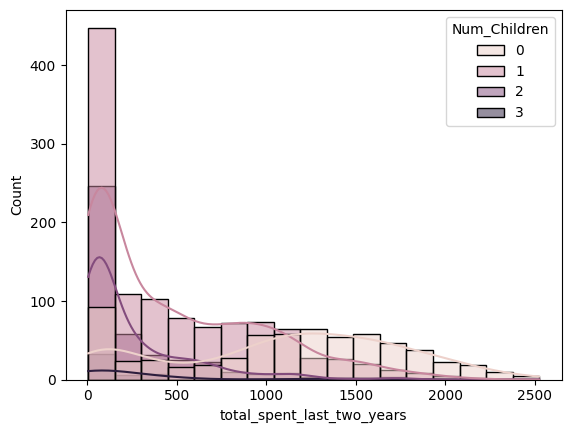

In [142]:
#yes this graph confirms that,when you have no children you dont worry and are free,but when not maybe you have some pressure,think of insurance and health care
#so you dont take risks
sns.histplot(data= df, x='total_spent_last_two_years',hue = 'Num_Children', kde=True)
plt.show()

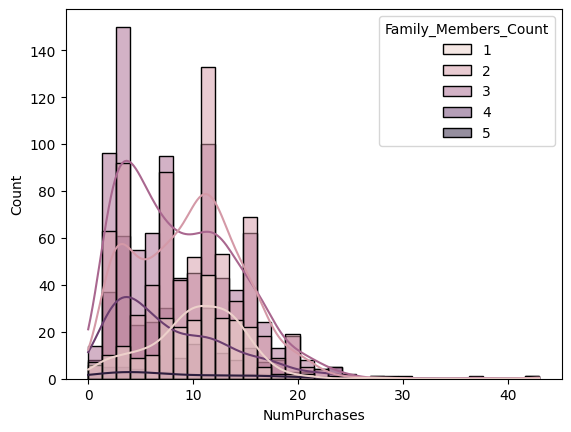

In [144]:
#this only confirms what we saw in the last cell
sns.histplot(data= df, x='NumPurchases',hue = 'Family_Members_Count', kde=True)
plt.show()

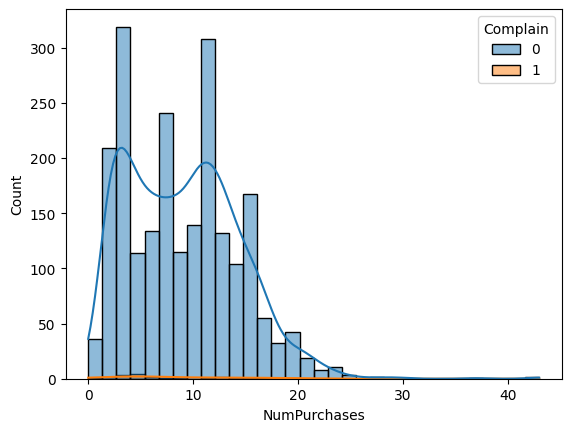

In [143]:
#there is very few complains,and for the few ones it is the same amount of plains for both new and old buyers
sns.histplot(data= df, x='NumPurchases',hue = 'Complain', kde=True)
plt.show()

<Axes: xlabel='total_spent_last_two_years', ylabel='NumPurchases'>

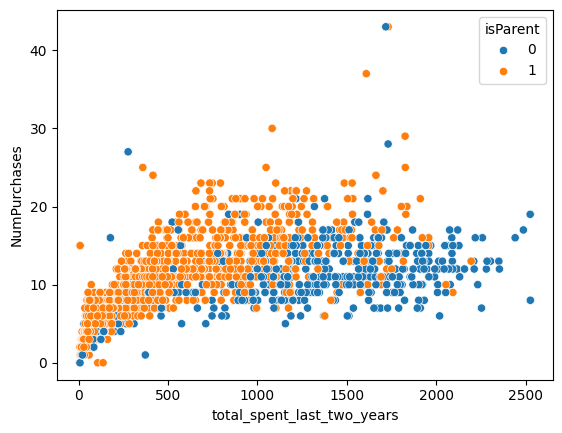

In [145]:
#this very clear scatter plot is like already clustering,we have two clear parts,it shows that single people spent a lot more than married ones
x = df['total_spent_last_two_years']
y = df['NumPurchases']
sns.scatterplot(data = df,x =x,y = y,hue = 'isParent')

<Axes: xlabel='total_spent_last_two_years', ylabel='NumPurchases'>

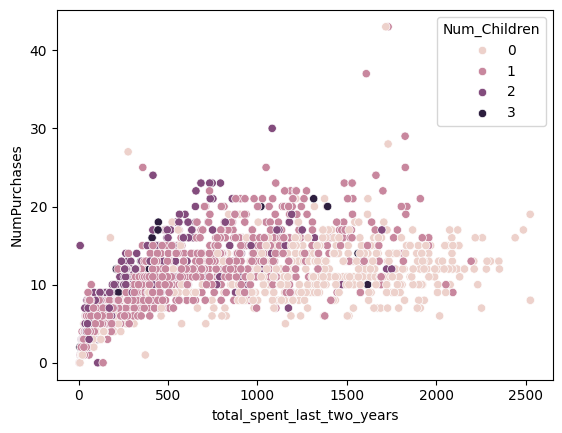

In [146]:
#we verify if we can have the same conclusion with num of children and yes!
x = df['total_spent_last_two_years']
y = df['NumPurchases']
sns.scatterplot(data = df,x =x,y = y,hue = 'Num_Children')

In [147]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children,age,Generation,Family_Members_Count,isParent,NumPurchases
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,68,Baby Boomers,1,0,21
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2,71,Baby Boomers,3,1,4
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,60,Generation X,2,0,11
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1,41,Millennials,3,1,4
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1,44,Millennials,3,1,13


# Data transformation

In [148]:
#okay now we need to transform our data so we can make clustering using different algorithms
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [149]:
#for education and generation features we will use ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
b_educ = np.array(['Basic','Graduation','2n Cycle','Master','PhD' ])
educ_oe = OrdinalEncoder(categories = [b_educ])
df['Education'] = educ_oe.fit_transform(df[['Education']])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children,age,Generation,Family_Members_Count,isParent,NumPurchases
0,1957,1.0,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,68,Baby Boomers,1,0,21
1,1954,1.0,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2,71,Baby Boomers,3,1,4
2,1965,1.0,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,60,Generation X,2,0,11
3,1984,1.0,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1,41,Millennials,3,1,4
4,1981,4.0,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1,44,Millennials,3,1,13


In [150]:
b_generation =  np.array(['Unknown','Silent Generation', 'Baby Boomers', 'Generation X', 'Millennials', 'Generation Z', 'Generation Alpha'])
gen_oe = OrdinalEncoder(categories=[b_generation])
df['Generation'] = gen_oe.fit_transform(df[['Generation']])

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children,age,Generation,Family_Members_Count,isParent,NumPurchases
0,1957,1.0,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,68,2.0,1,0,21
1,1954,1.0,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2,71,2.0,3,1,4
2,1965,1.0,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,60,3.0,2,0,11
3,1984,1.0,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1,41,4.0,3,1,4
4,1981,4.0,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1,44,4.0,3,1,13


In [151]:
#for marital status we will use ine hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False).set_output(transform = 'pandas')

In [152]:
marital_transformed = ohe.fit_transform(df[['Marital_Status']])
df = pd.concat([df,marital_transformed],axis = 1).drop(columns = ['Marital_Status'])
df

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children,age,Generation,Family_Members_Count,isParent,NumPurchases,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Unknown,Marital_Status_Widow
0,1957,1.0,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,68,2.0,1,0,21,0.0,0.0,1.0,0.0,0.0,0.0
1,1954,1.0,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2,71,2.0,3,1,4,0.0,0.0,1.0,0.0,0.0,0.0
2,1965,1.0,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,60,3.0,2,0,11,0.0,0.0,0.0,1.0,0.0,0.0
3,1984,1.0,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1,41,4.0,3,1,4,0.0,0.0,0.0,1.0,0.0,0.0
4,1981,4.0,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1,44,4.0,3,1,13,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1.0,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341,1,58,3.0,3,1,14,0.0,1.0,0.0,0.0,0.0,0.0
2236,1946,4.0,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,444,3,79,2.0,5,1,17,0.0,0.0,0.0,1.0,0.0,0.0
2237,1981,1.0,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241,0,44,4.0,1,0,6,1.0,0.0,0.0,0.0,0.0,0.0
2238,1956,3.0,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843,1,69,2.0,3,1,13,0.0,0.0,0.0,1.0,0.0,0.0


In [153]:
#for Date of customer's enrollment with the company we will transform it into days since enrollment because we need numerical data
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Days_Since_Enrollment'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days
df.drop(columns=['Dt_Customer'], inplace=True)
df.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent_last_two_years,Num_Children,age,Generation,Family_Members_Count,isParent,NumPurchases,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Unknown,Marital_Status_Widow,Days_Since_Enrollment
0,1957,1.0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,68,2.0,1,0,21,0.0,0.0,1.0,0.0,0.0,0.0,4589
1,1954,1.0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,2,71,2.0,3,1,4,0.0,0.0,1.0,0.0,0.0,0.0,4039
2,1965,1.0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,60,3.0,2,0,11,0.0,0.0,0.0,1.0,0.0,0.0,4238
3,1984,1.0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,1,41,4.0,3,1,4,0.0,0.0,0.0,1.0,0.0,0.0,4065
4,1981,4.0,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,1,44,4.0,3,1,13,0.0,1.0,0.0,0.0,0.0,0.0,4087


# Data clustering

In [154]:
#lets verify types to make sure we can start clustering
df.dtypes

,0
Year_Birth,int64
Education,float64
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64


In [113]:
#here we use non hieararchical clustering with kmeans and get cluster labels
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2,init = 'k-means++',max_iter=300,random_state=12)
kmeans.fit(df)
print(kmeans.labels_)

[0 1 0 ... 0 0 0]


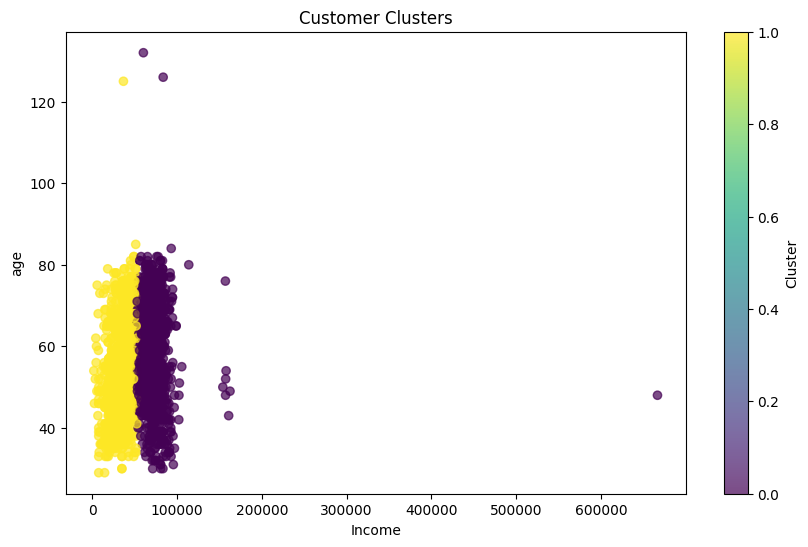

In [160]:
#once we have it let's visualize it with 2 features
x_feature = 'Income'
y_feature = 'age'

plt.figure(figsize=(10, 6))
plt.scatter(df[x_feature], df[y_feature], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Customer Clusters")
plt.colorbar(label='Cluster')
plt.show()
#it created two clear clusters

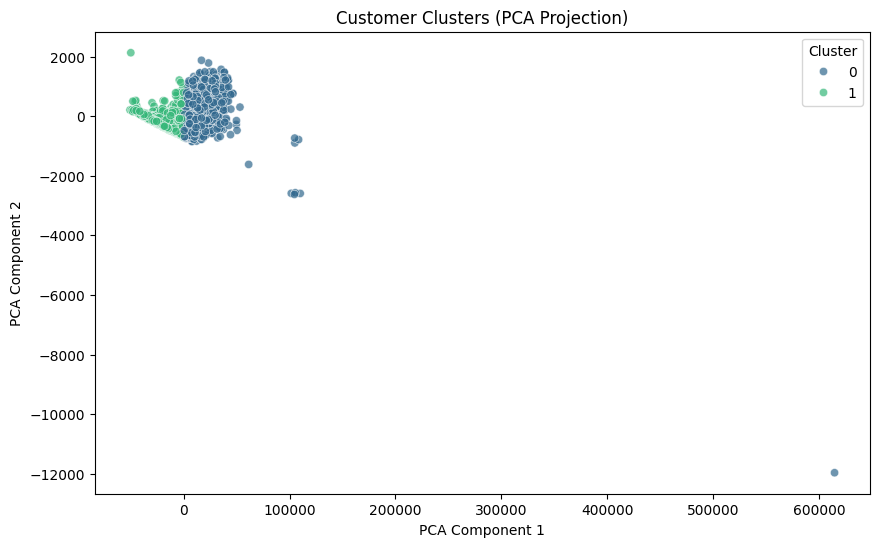

In [162]:
#now lets see with dimensiality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans.labels_, palette='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Clusters (PCA Projection)")
plt.legend(title="Cluster")
plt.show()
#and it works also very well,we got weirdly one which is very far,maybe an outlier,but for the rest there is twi clear clusters

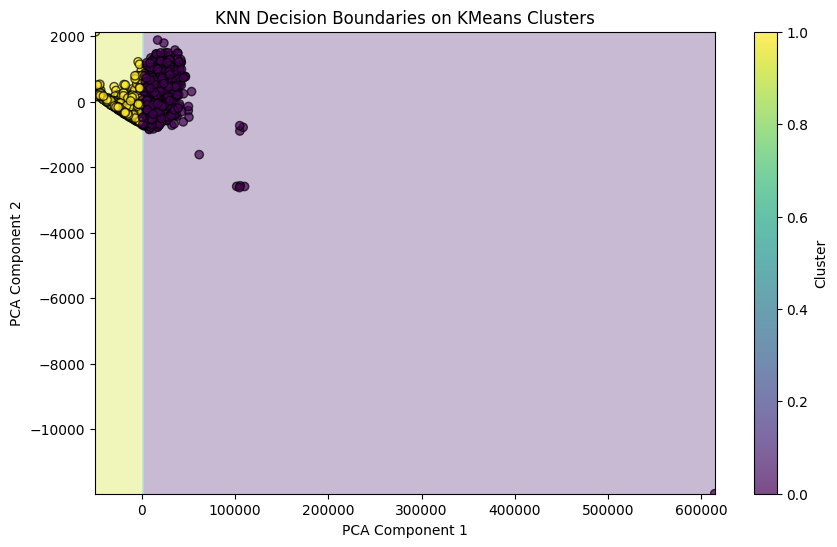

In [165]:
#now based on our PCA and Kmeans lets try to make it clearer with knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_pca, kmeans.labels_)

x_min, x_max = df_pca[:, 0].min() - 1, df_pca[:, 0].max() + 1
y_min, y_max = df_pca[:, 1].min() - 1, df_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Decision Boundaries on KMeans Clusters")
plt.colorbar(label="Cluster")
plt.show()
#the outlier is annoying,we need to remove it to see better

In [166]:
#lets use svm to remove it!
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
outliers = svm.fit_predict(df_pca)

df_cleaned = df_pca[outliers == 1]


[0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1
 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0
 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0
 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 1 0 0 1 1 0 0 1 

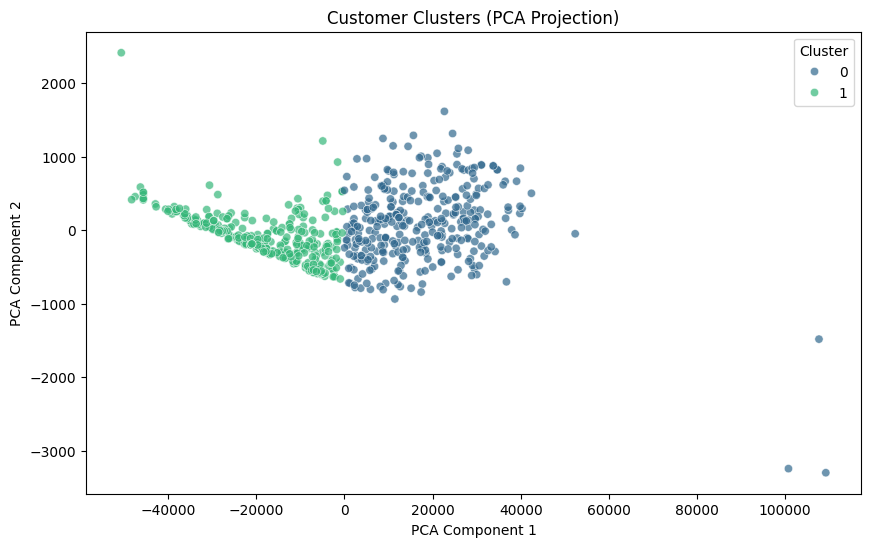

In [170]:
#now lets test again!

kmeans = KMeans(n_clusters = 2,init = 'k-means++',max_iter=300,random_state=12)
kmeans.fit(df_cleaned)

print(kmeans.labels_)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans.labels_, palette='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Clusters (PCA Projection)")
plt.legend(title="Cluster")
plt.show()
#now it is way clearer!so lets see again for KNN

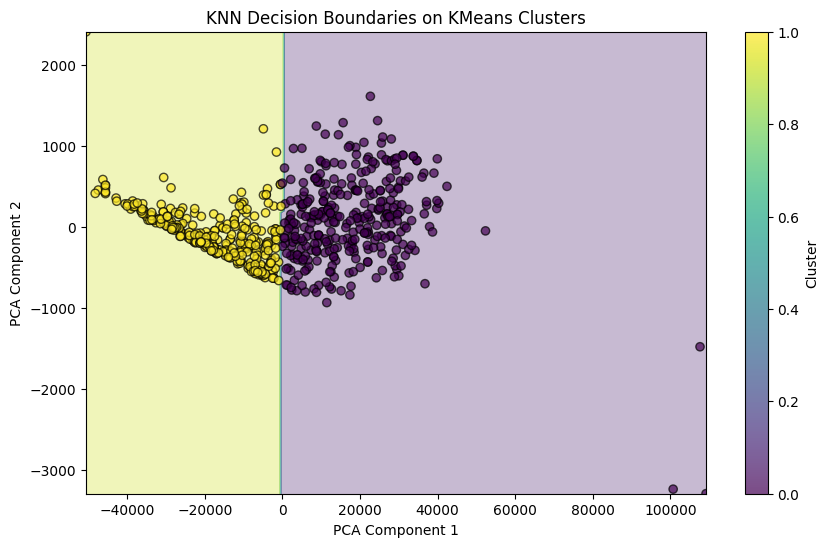

In [171]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_pca, kmeans.labels_)

x_min, x_max = df_pca[:, 0].min() - 1, df_pca[:, 0].max() + 1
y_min, y_max = df_pca[:, 1].min() - 1, df_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Decision Boundaries on KMeans Clusters")
plt.colorbar(label="Cluster")
plt.show()

In [172]:
#now it is waay clearer!we could split our data into two clusters,
#for me the first one represnt those who have a family,are fmarried and make attention with their expenses
#and second one represents the young,single person who just wants to enjoy life!